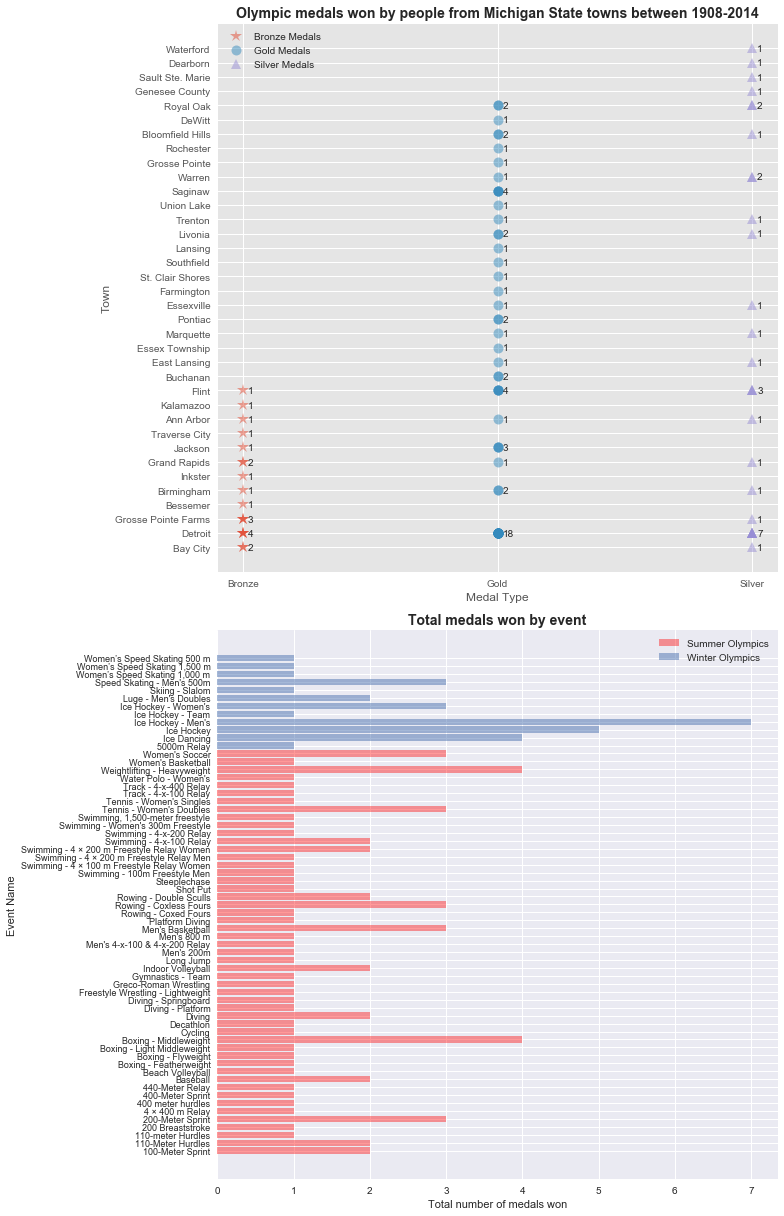

In [51]:
import pandas as pd

df=pd.read_excel('olympics_data.xlsx')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

#trim all columns
df_obj=df.select_dtypes(['object'])
df[df_obj.columns]=df_obj.apply(lambda x: x.str.strip())

bronze_data=df[df['Medal']=='Bronze']
gold_data=df[df['Medal']=='Gold']
silver_data=df[df['Medal']=='Silver']

fig=plt.figure(figsize=(11, 17));
axis1=fig.add_subplot(211);

plt.style.use('seaborn');
plt.plot(bronze_data['Medal'],bronze_data['Hometown'],'*',label='Bronze Medals',alpha=0.5,markersize=12);
plt.plot(gold_data['Medal'],gold_data['Hometown'], 'o',label='Gold Medals',alpha=0.5,markersize=10);
plt.plot(silver_data['Medal'],silver_data['Hometown'],'^',label='Silver Medals',alpha=0.5,markersize=10);
plt.title('Olympic medals won by people from Michigan State towns between 1908-2014',fontweight="bold",fontsize=14);
plt.xlabel('Medal Type');
plt.ylabel('Town');
plt.legend();
plt.tight_layout();

count_data=df.groupby('Hometown')['Medal'].value_counts()
count_data.columns=['Counts']
df2=pd.DataFrame(count_data)
df2.columns=['Counts']
df2.reset_index(inplace=True)

ax=plt.gca()

for index, row in df2.iterrows():
    ax.annotate(str(row['Counts']),xy=(row['Medal'],row['Hometown']),xytext=(5,-3),textcoords='offset points')


#second plot

count2_data=df.groupby('Event')['Olympics'].value_counts()
count2_data.columns=['Counts']
df3=pd.DataFrame(count2_data)
df3.columns=['Counts']
df3.reset_index(inplace=True)

summer_medals=df3[df3['Olympics']=='Summer Olympics']
winter_medals=df3[df3['Olympics']=='Winter Olympics']

from matplotlib import cm
import matplotlib
matplotlib.colors.Normalize


norm=matplotlib.colors.Normalize(vmin=-1.96, vmax=1.96)

# colors=[]
# for index,row in df3.iterrows():
#     if(row['Olympics']=='Summer Olympics'):
#         colors.append(cm.Reds(norm(row['Counts'])))
#     else:
#         colors.append(cm.Greens(norm(row['Counts'])))
        
#plot3=plt.figure(figsize=(12, 12));

axis2 = fig.add_subplot(212)

plt.barh(summer_medals['Event'],summer_medals['Counts'],alpha=0.4,label='Summer Olympics',color='red');
plt.barh(winter_medals['Event'],winter_medals['Counts'],alpha=0.5,label='Winter Olympics');
plt.title('Total medals won by event',fontweight="bold",fontsize=14)
plt.xlabel('Total number of medals won')
plt.ylabel('Event Name')
# for tick in plt.gca().xaxis.get_major_ticks():
#     tick.label.set_fontsize(10)
        
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(9)
plt.tight_layout()
plt.legend()
plt.show()
